# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.20 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline





In [3]:
from agent import Agent

In [4]:
def plot_scores(scores, name='v0'):
    fig = plt.figure()
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.axhline(30, linestyle=':', color='black')
    plt.savefig('figs/scores_%s.pdf'%name)
    plt.savefig('figs/scores_%s.png'%name)



In [5]:
def env_step(env, actions, brain_name):
    env_info = env.step(actions)[brain_name]
    return env_info.vector_observations, env_info.rewards, env_info.local_done

In [6]:


def ddpg_train(env, agent, n_episodes=1000, num_agents=20):
    scores = []
    scores_window = deque(maxlen=100)


    for episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]            # reset the environment
        states = env_info.vector_observations                        # get initial state
        agent.reset()                                                # reset the agent noise
        score = np.zeros(num_agents)                                 # initialize scores
        
        t=1
        while True:
            actions = agent.act(states)                              # get actions
        
            env_info = env.step( actions )[brain_name]               # send the action to the environment  
            next_states, rewards, dones = env_step(env, actions, brain_name)  # get next states, rewards, dones from env   

            agent.step(states, actions, rewards, next_states, dones, t) # step the agent

            score += rewards                                         
        
            states = next_states                                           
            
            t += 1                                                  
            
            if np.any( dones ):                                          # exit loop if episode finished (after 1000 timesteps)       
                break                                        


        scores.append(np.mean(score))
        scores_window.append(np.mean(score))

        print('Episode: \t{} \tScore: \t{:.2f} \tAverage Score: \t{:.2f}'.format(episode, np.mean(score), np.mean(scores_window)))  

        
        if np.mean(scores_window) >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)))
            agent.checkpoint()
            break    

    return scores




# Load unity environment

In [7]:
# Initialize env
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# get action and state sizes
action_size = brain.vector_action_space_size
state_size = brain.vector_observation_space_size

print('Brain name:', brain_name)

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Brain name: ReacherBrain
Number of agents: 20


# Start training

In [8]:
# to keep udacity workspace active during training
from workspace_utils import active_session

## Learn once at every timestep, incl gradient clipping

/home/workspace/agent.py:112: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode: 	0 	Score: 	0.42 	Average Score: 	0.42
Episode: 	1 	Score: 	0.16 	Average Score: 	0.29
Episode: 	2 	Score: 	0.41 	Average Score: 	0.33
Episode: 	3 	Score: 	0.66 	Average Score: 	0.41
Episode: 	4 	Score: 	0.77 	Average Score: 	0.48
Episode: 	5 	Score: 	1.05 	Average Score: 	0.58
Episode: 	6 	Score: 	1.52 	Average Score: 	0.71
Episode: 	7 	Score: 	2.12 	Average Score: 	0.89
Episode: 	8 	Score: 	2.39 	Average Score: 	1.06
Episode: 	9 	Score: 	2.59 	Average Score: 	1.21
Episode: 	10 	Score: 	3.34 	Average Score: 	1.40
Episode: 	11 	Score: 	3.50 	Average Score: 	1.58
Episode: 	12 	Score: 	3.88 	Average Score: 	1.76
Episode: 	13 	Score: 	4.37 	Average Score: 	1.94
Episode: 	14 	Score: 	5.32 	Average Score: 	2.17
Episode: 	15 	Score: 	6.19 	Average Score: 	2.42
Episode: 	16 	Score: 	6.47 	Average Score: 	2.66
Episode: 	17 	Score: 	7.30 	Average Score: 	2.92
Episode: 	18 	Score: 	7.67 	Average Score: 	3.17
Episode: 	19 	Score: 	4.78 	Average Score: 	3.25
Episode: 	20 	Score: 	8.41 	Av

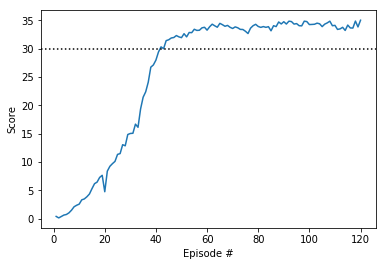

In [9]:
# Initialize agent and train

learn_every = 1
num_learn = 1
do_clip=True
checkpoints_folder = './checkpoints/v0/'

agent = Agent(num_agents, state_size, action_size, 4, learn_every, num_learn, do_clip=do_clip, checkpoint_folder=checkpoints_folder )

with active_session():
    scores = ddpg_train(env, agent, n_episodes=300)

plot_scores(scores, name='v0')

## Learn 10 times every 20 timesteps, incl gradient clipping

/home/workspace/agent.py:112: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode: 	0 	Score: 	0.31 	Average Score: 	0.31
Episode: 	1 	Score: 	0.01 	Average Score: 	0.16
Episode: 	2 	Score: 	0.01 	Average Score: 	0.11
Episode: 	3 	Score: 	0.01 	Average Score: 	0.09
Episode: 	4 	Score: 	0.03 	Average Score: 	0.07
Episode: 	5 	Score: 	0.00 	Average Score: 	0.06
Episode: 	6 	Score: 	0.01 	Average Score: 	0.05
Episode: 	7 	Score: 	0.02 	Average Score: 	0.05
Episode: 	8 	Score: 	0.01 	Average Score: 	0.05
Episode: 	9 	Score: 	0.01 	Average Score: 	0.04
Episode: 	10 	Score: 	0.02 	Average Score: 	0.04
Episode: 	11 	Score: 	0.01 	Average Score: 	0.04
Episode: 	12 	Score: 	0.23 	Average Score: 	0.05
Episode: 	13 	Score: 	0.43 	Average Score: 	0.08
Episode: 	14 	Score: 	0.70 	Average Score: 	0.12
Episode: 	15 	Score: 	0.88 	Average Score: 	0.17
Episode: 	16 	Score: 	0.85 	Average Score: 	0.21
Episode: 	17 	Score: 	0.97 	Average Score: 	0.25
Episode: 	18 	Score: 	1.14 	Average Score: 	0.30
Episode: 	19 	Score: 	1.17 	Average Score: 	0.34
Episode: 	20 	Score: 	1.37 	Av

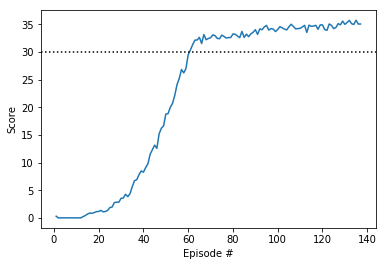

In [10]:
# Initialize agent and train

learn_every = 20
num_learn = 10
checkpoints_folder = './checkpoints/v1/'

agent = Agent(num_agents, state_size, action_size, 4, learn_every, num_learn, checkpoint_folder=checkpoints_folder )

with active_session():
    scores = ddpg_train(env, agent, n_episodes=300)

plot_scores(scores, name='v1')

## Learn once every timestep, without gradient clipping

Episode: 	0 	Score: 	0.08 	Average Score: 	0.08
Episode: 	1 	Score: 	0.01 	Average Score: 	0.04
Episode: 	2 	Score: 	0.02 	Average Score: 	0.04
Episode: 	3 	Score: 	0.00 	Average Score: 	0.03
Episode: 	4 	Score: 	0.01 	Average Score: 	0.02
Episode: 	5 	Score: 	0.02 	Average Score: 	0.02
Episode: 	6 	Score: 	0.01 	Average Score: 	0.02
Episode: 	7 	Score: 	0.01 	Average Score: 	0.02
Episode: 	8 	Score: 	0.77 	Average Score: 	0.10
Episode: 	9 	Score: 	0.94 	Average Score: 	0.19
Episode: 	10 	Score: 	1.01 	Average Score: 	0.26
Episode: 	11 	Score: 	0.98 	Average Score: 	0.32
Episode: 	12 	Score: 	0.93 	Average Score: 	0.37
Episode: 	13 	Score: 	0.66 	Average Score: 	0.39
Episode: 	14 	Score: 	1.34 	Average Score: 	0.45
Episode: 	15 	Score: 	2.06 	Average Score: 	0.55
Episode: 	16 	Score: 	2.34 	Average Score: 	0.66
Episode: 	17 	Score: 	2.87 	Average Score: 	0.78
Episode: 	18 	Score: 	3.56 	Average Score: 	0.93
Episode: 	19 	Score: 	5.06 	Average Score: 	1.13
Episode: 	20 	Score: 	5.08 	Av

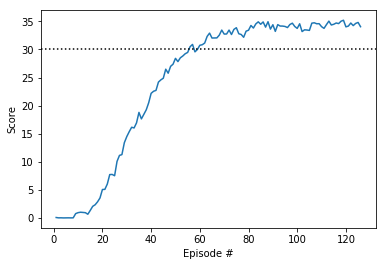

In [11]:
# Initialize agent and train

learn_every = 1
num_learn = 1
do_clip=False
checkpoints_folder = './checkpoints/v2/'

agent = Agent(num_agents, state_size, action_size, 4, learn_every, num_learn, do_clip=do_clip, checkpoint_folder=checkpoints_folder )

with active_session():
    scores = ddpg_train(env, agent, n_episodes=300)

plot_scores(scores, name='v2')

## Larger learning rate

LR is 1e-3 instead of 1e-4

/home/workspace/agent.py:112: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode: 	0 	Score: 	0.56 	Average Score: 	0.56
Episode: 	1 	Score: 	0.40 	Average Score: 	0.48
Episode: 	2 	Score: 	1.05 	Average Score: 	0.67
Episode: 	3 	Score: 	0.98 	Average Score: 	0.75
Episode: 	4 	Score: 	1.28 	Average Score: 	0.86
Episode: 	5 	Score: 	1.32 	Average Score: 	0.93
Episode: 	6 	Score: 	1.94 	Average Score: 	1.08
Episode: 	7 	Score: 	1.91 	Average Score: 	1.18
Episode: 	8 	Score: 	2.20 	Average Score: 	1.29
Episode: 	9 	Score: 	2.36 	Average Score: 	1.40
Episode: 	10 	Score: 	2.22 	Average Score: 	1.48
Episode: 	11 	Score: 	2.00 	Average Score: 	1.52
Episode: 	12 	Score: 	2.31 	Average Score: 	1.58
Episode: 	13 	Score: 	2.53 	Average Score: 	1.65
Episode: 	14 	Score: 	2.26 	Average Score: 	1.69
Episode: 	15 	Score: 	3.14 	Average Score: 	1.78
Episode: 	16 	Score: 	3.70 	Average Score: 	1.89
Episode: 	17 	Score: 	4.29 	Average Score: 	2.03
Episode: 	18 	Score: 	4.42 	Average Score: 	2.15
Episode: 	19 	Score: 	4.22 	Average Score: 	2.26
Episode: 	20 	Score: 	4.42 	Av

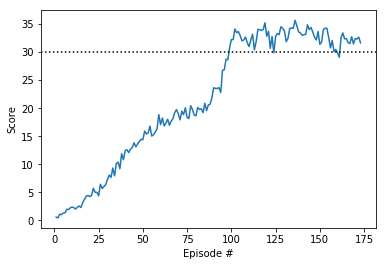

In [12]:
# Initialize agent and train

learn_every = 1
num_learn = 1
do_clip=True
lr = 1e-3
checkpoints_folder = './checkpoints/v3/'

agent = Agent(num_agents, state_size, action_size, 4, learn_every, num_learn, lr_actor=lr, lr_critic=lr, do_clip=do_clip, checkpoint_folder=checkpoints_folder )

with active_session():
    scores = ddpg_train(env, agent, n_episodes=300)

plot_scores(scores, name='v3')


## Faster soft update

tau is 1e-2 instead of 1e-3

/home/workspace/agent.py:112: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode: 	0 	Score: 	0.76 	Average Score: 	0.76
Episode: 	1 	Score: 	1.06 	Average Score: 	0.91
Episode: 	2 	Score: 	1.12 	Average Score: 	0.98
Episode: 	3 	Score: 	1.54 	Average Score: 	1.12
Episode: 	4 	Score: 	2.24 	Average Score: 	1.34
Episode: 	5 	Score: 	3.13 	Average Score: 	1.64
Episode: 	6 	Score: 	3.95 	Average Score: 	1.97
Episode: 	7 	Score: 	4.73 	Average Score: 	2.32
Episode: 	8 	Score: 	6.32 	Average Score: 	2.76
Episode: 	9 	Score: 	7.86 	Average Score: 	3.27
Episode: 	10 	Score: 	7.28 	Average Score: 	3.63
Episode: 	11 	Score: 	8.61 	Average Score: 	4.05
Episode: 	12 	Score: 	10.67 	Average Score: 	4.56
Episode: 	13 	Score: 	11.70 	Average Score: 	5.07
Episode: 	14 	Score: 	12.66 	Average Score: 	5.58
Episode: 	15 	Score: 	14.79 	Average Score: 	6.15
Episode: 	16 	Score: 	15.68 	Average Score: 	6.71
Episode: 	17 	Score: 	16.31 	Average Score: 	7.24
Episode: 	18 	Score: 	16.35 	Average Score: 	7.72
Episode: 	19 	Score: 	16.71 	Average Score: 	8.17
Episode: 	20 	Score: 	

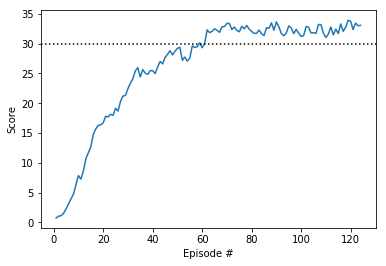

In [13]:
# Initialize agent and train

learn_every = 1
num_learn = 1
do_clip = True
tau = 1e-2
checkpoints_folder = './checkpoints/v4/'

agent = Agent(num_agents, state_size, action_size, 4, learn_every, num_learn, tau=tau, do_clip=do_clip, checkpoint_folder=checkpoints_folder )

with active_session():
    scores = ddpg_train(env, agent, n_episodes=300)

plot_scores(scores, name='v4')

## Larger replay buffer

/home/workspace/agent.py:112: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode: 	0 	Score: 	0.19 	Average Score: 	0.19
Episode: 	1 	Score: 	0.87 	Average Score: 	0.53
Episode: 	2 	Score: 	0.75 	Average Score: 	0.61
Episode: 	3 	Score: 	1.06 	Average Score: 	0.72
Episode: 	4 	Score: 	0.99 	Average Score: 	0.77
Episode: 	5 	Score: 	1.34 	Average Score: 	0.87
Episode: 	6 	Score: 	1.32 	Average Score: 	0.93
Episode: 	7 	Score: 	1.82 	Average Score: 	1.04
Episode: 	8 	Score: 	2.07 	Average Score: 	1.16
Episode: 	9 	Score: 	2.44 	Average Score: 	1.28
Episode: 	10 	Score: 	3.17 	Average Score: 	1.46
Episode: 	11 	Score: 	3.24 	Average Score: 	1.60
Episode: 	12 	Score: 	4.45 	Average Score: 	1.82
Episode: 	13 	Score: 	4.79 	Average Score: 	2.04
Episode: 	14 	Score: 	5.48 	Average Score: 	2.27
Episode: 	15 	Score: 	5.43 	Average Score: 	2.46
Episode: 	16 	Score: 	5.77 	Average Score: 	2.66
Episode: 	17 	Score: 	6.45 	Average Score: 	2.87
Episode: 	18 	Score: 	7.18 	Average Score: 	3.10
Episode: 	19 	Score: 	7.70 	Average Score: 	3.33
Episode: 	20 	Score: 	8.80 	Av

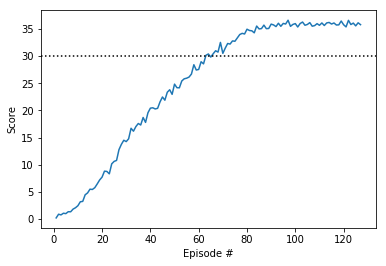

In [14]:
# Initialize agent and train

learn_every = 1
num_learn = 1
do_clip = True
buffer_size=int(1e6)
checkpoints_folder = './checkpoints/v5/'

agent = Agent(num_agents, state_size, action_size, 4, learn_every, num_learn, buffer_size=buffer_size, do_clip=do_clip, checkpoint_folder=checkpoints_folder )

with active_session():
    scores = ddpg_train(env, agent, n_episodes=300)

plot_scores(scores, name='v5')

## Learn every 20 steps, learn 10 times, large replay buffer

/home/workspace/agent.py:112: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode: 	0 	Score: 	0.26 	Average Score: 	0.26
Episode: 	1 	Score: 	0.01 	Average Score: 	0.13
Episode: 	2 	Score: 	0.01 	Average Score: 	0.09
Episode: 	3 	Score: 	0.00 	Average Score: 	0.07
Episode: 	4 	Score: 	0.00 	Average Score: 	0.06
Episode: 	5 	Score: 	0.00 	Average Score: 	0.05
Episode: 	6 	Score: 	0.01 	Average Score: 	0.04
Episode: 	7 	Score: 	0.03 	Average Score: 	0.04
Episode: 	8 	Score: 	0.08 	Average Score: 	0.04
Episode: 	9 	Score: 	0.15 	Average Score: 	0.06
Episode: 	10 	Score: 	0.04 	Average Score: 	0.05
Episode: 	11 	Score: 	0.05 	Average Score: 	0.05
Episode: 	12 	Score: 	0.03 	Average Score: 	0.05
Episode: 	13 	Score: 	0.03 	Average Score: 	0.05
Episode: 	14 	Score: 	0.07 	Average Score: 	0.05
Episode: 	15 	Score: 	0.03 	Average Score: 	0.05
Episode: 	16 	Score: 	0.05 	Average Score: 	0.05
Episode: 	17 	Score: 	0.03 	Average Score: 	0.05
Episode: 	18 	Score: 	0.61 	Average Score: 	0.08
Episode: 	19 	Score: 	0.82 	Average Score: 	0.12
Episode: 	20 	Score: 	0.90 	Av

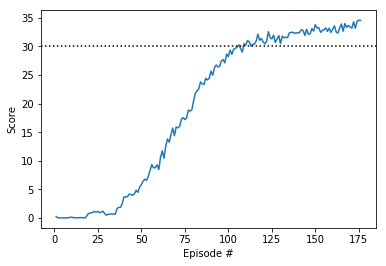

In [15]:
# Initialize agent and train

learn_every = 20
num_learn = 10
buffer_size=int(1e6)
do_clip = True
checkpoints_folder = './checkpoints/v6/'

agent = Agent(num_agents, state_size, action_size, 4, learn_every, num_learn, buffer_size=buffer_size, do_clip=do_clip, checkpoint_folder=checkpoints_folder )

with active_session():
    scores = ddpg_train(env, agent, n_episodes=300)

plot_scores(scores, name='v6')

In [14]:
env.close()